<a href="https://colab.research.google.com/github/msiplab/AtipWork/blob/develop/python/sample02_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# 画像データの入出力
# 色空間変換 
# 
# 画像処理特論
# 
# 村松 正吾 
# 
# 動作確認: Python 3.7, PyTorch 1.8

In [8]:
# Color space conversion
# 
# Advanced Topics in Image Processing
# 
# Shogo MURAMATSU
# 
# Verified: Python 3.7, PyTorch 1.8

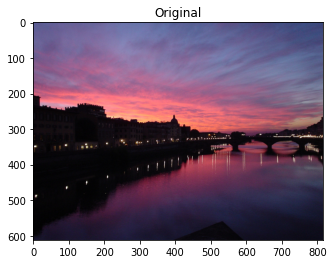

In [9]:
# (Preparation of sample image)
# 
# 本サンプルで利用する画像データを収めたdata フォルダにパスをとおす。
# 
# Create a path to the data folder that contains images used in this sample.
!pip install kornia
from PIL import Image
import requests
import torch
import torchvision
import kornia
from matplotlib import pyplot as plt
im2double = torchvision.transforms.ConvertImageDtype(torch.double)
im2uint8 = torchvision.transforms.ConvertImageDtype(torch.uint8)
rgb2gray = torchvision.transforms.Grayscale()
totensor = torchvision.transforms.ToTensor()
topilimg = torchvision.transforms.ToPILImage()

# Reading original image
#X = im2double(totensor(Image.open('./data/firenzeRgb.jpg')))
url = 'https://github.com/msiplab/AtipWork/raw/master/data/firenzeRgb.jpg'
X = im2double(totensor(Image.open(requests.get(url, stream=True).raw)))

plt.figure(1)
plt.imshow(topilimg(X))
plt.title('Original')
plt.show()

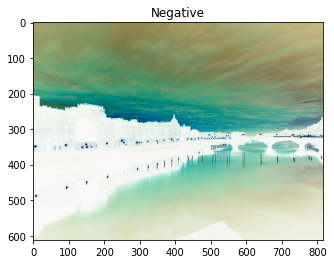

In [10]:
# (Negative conversion)
# 
# $$$\left(\begin{array}{l}y_\mathrm{R} \\ y_\mathrm{G} \\ y_\mathrm{B}\end{array}\right)=T\left(\begin{array}{l}x_\mathrm{R} 
# \\ x_\mathrm{G} \\ x_\mathrm{B}\end{array}\right)=\left(\begin{array}{l}1.0 
# \\ 1.0 \\ 1.0\end{array}\right)-\left(\begin{array}{l}x_\mathrm{R} \\ x_\mathrm{G} 
# \\ x_\mathrm{B}\end{array}\right)$$$

# Definition of negative conversion
Tn = lambda x: 1.0-x
# Negative conversion of image I
Y = Tn(X)
plt.figure(2)
plt.imshow(topilimg(Y))
plt.title('Negative')
plt.show()

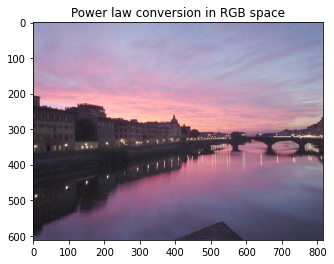

In [11]:
# (Power law conversion in RGB space)
# 
# $$$\left(\begin{array}{l}y_\mathrm{R} \\ y_\mathrm{G} \\ y_\mathrm{B}\end{array}\right)=T\left(\begin{array}{l}x_\mathrm{R} 
# \\ x_\mathrm{G} \\ x_\mathrm{B}\end{array}\right)=\left(\begin{array}{l}x_\mathrm{R}^\gamma 
# \\ x_\mathrm{G}^\gamma \\ x_\mathrm{B}^\gamma\end{array}\right)$$$

# Parameter setting of power law conversion
gamma = 0.5
imadjust = kornia.enhance.AdjustGamma(gamma)

# Power law conversion in RGB space
Y = imadjust(X)
plt.figure(3)
plt.imshow(topilimg(Y))
plt.title('Power law conversion in RGB space')
plt.show()

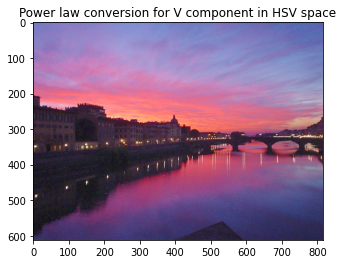

In [12]:
# (Power law conversion for V component in HSV space)
# 
# $$$\left(\begin{array}{l}u_\mathrm{H} \\ u_\mathrm{S} \\ u_\mathrm{V}\end{array}\right)=\mathrm{rgb2hsv}\left(\begin{array}{l}x_\mathrm{R} 
# \\ x_\mathrm{G} \\ x_\mathrm{B}\end{array}\right)$$$
# 
# $$$\left(\begin{array}{l}y_\mathrm{R} \\ y_\mathrm{G} \\ y_\mathrm{B}\end{array}\right)=\mathrm{hsv2rgb}\left(\begin{array}{l}u_\mathrm{H} 
# \\ u_\mathrm{S} \\ u_\mathrm{V}^\gamma\end{array}\right)$$$
rgb2hsv = kornia.color.RgbToHsv()
hsv2rgb = kornia.color.HsvToRgb()
# Parameter setting of power law conversion
gamma = 0.5
imadjust = kornia.enhance.AdjustGamma(gamma)

# Power law conversion for V component in HSV space
U = rgb2hsv(X)
U[2,:,:] = imadjust(U[2,:,:])
Y = hsv2rgb(U)
plt.figure(4)
plt.imshow(topilimg(Y))
plt.title('Power law conversion for V component in HSV space')
plt.show()

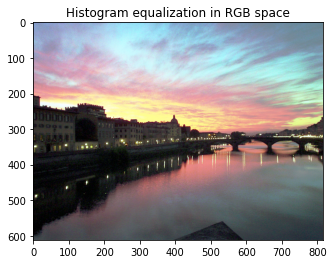

In [13]:
# (Histogram equalization in RGB space)
# 
# $$$\left(\begin{array}{l}y_\mathrm{R} \\ y_\mathrm{G} \\ y_\mathrm{B}\end{array}\right)=T\left(\begin{array}{l}x_\mathrm{R} 
# \\ x_\mathrm{G} \\ x_\mathrm{B}\end{array}\right)=\left(\begin{array}{l}\mathrm{histeq}(x_\mathrm{R}) 
# \\ \mathrm{histeq}(x_\mathrm{G}) \\ \mathrm{histeq}(x_\mathrm{B})\end{array}\right)$$$
histeq = lambda x: kornia.enhance.equalize(x).squeeze(0)

# Histogram equalization in RGB space
Y = histeq(X)
plt.figure(5)
plt.imshow(topilimg(Y))
plt.title('Histogram equalization in RGB space')
plt.show()

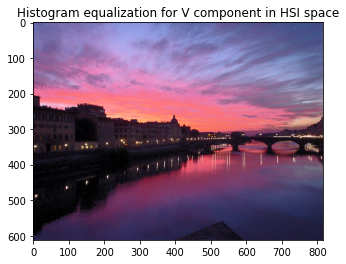

In [14]:
# (Histogram equalization for V component in HSV space)
# 
# $$$\left(\begin{array}{l}u_\mathrm{H} \\ u_\mathrm{S} \\ u_\mathrm{V}\end{array}\right)=\mathrm{rgb2hsv}\left(\begin{array}{l}x_\mathrm{R} 
# \\ x_\mathrm{G} \\ x_\mathrm{B}\end{array}\right)$$$
# 
# $$$\left(\begin{array}{l}y_\mathrm{R} \\ y_\mathrm{G} \\ y_\mathrm{B}\end{array}\right)=\mathrm{hsv2rgb}\left(\begin{array}{c}u_\mathrm{H} 
# \\ u_\mathrm{S} \\ \mathrm{histeq}(u_\mathrm{V})\end{array}\right)$$$

# Histogram equalization for V component in HSV space
U = rgb2hsv(X)
U[2,:,:] = histeq(U[2,:,:])
Y = hsv2rgb(U)
plt.figure(6)
plt.imshow(topilimg(Y))
plt.title('Histogram equalization for V component in HSI space')
plt.show()

In [15]:
# © Copyright, Shogo MURAMATSU, All rights reserved.